In [68]:
from selenium import webdriver as wb
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from kiwipiepy import Kiwi
from wordcloud import WordCloud as wc
from collections import Counter
import re

- '음식물 처리기' 키워드로 네이버 지식인에 검색
- 6개월 이내의 데이터를 수집하여 전처리를 통해 워드 클라우드 생성

In [2]:
def preprocess_sentence_kr(w):
    w = w.strip()
    w = re.sub(r"[^0-9가-힣?.!,]+"," ", w)
    w = w.strip()
    return w

### 실습
1. 네이버 메인페이지 요청
2. "음식물 처리기"
3. 위의 탭들 중에서 "지식in"으로 들어가야함
4. 기간 설정을 통해 6개월 이내의 데이터 수집

In [3]:
driver = wb.Chrome()

In [4]:
driver.get("https://www.naver.com")

In [5]:
search = driver.find_element(By.ID,'query')

In [6]:
search.send_keys("음식물 처리기"+"\n")

In [7]:
driver.find_elements(By.CSS_SELECTOR,'a.tab')

[<selenium.webdriver.remote.webelement.WebElement (session="aeeb463566b0b106c8ef70874509d9a6", element="f.B733429DB7CDEC9F99294AF0EA92F965.d.73DD2BDAF592434D11E31D2F8853A33C.e.3329")>,
 <selenium.webdriver.remote.webelement.WebElement (session="aeeb463566b0b106c8ef70874509d9a6", element="f.B733429DB7CDEC9F99294AF0EA92F965.d.73DD2BDAF592434D11E31D2F8853A33C.e.3331")>,
 <selenium.webdriver.remote.webelement.WebElement (session="aeeb463566b0b106c8ef70874509d9a6", element="f.B733429DB7CDEC9F99294AF0EA92F965.d.73DD2BDAF592434D11E31D2F8853A33C.e.3334")>,
 <selenium.webdriver.remote.webelement.WebElement (session="aeeb463566b0b106c8ef70874509d9a6", element="f.B733429DB7CDEC9F99294AF0EA92F965.d.73DD2BDAF592434D11E31D2F8853A33C.e.3337")>,
 <selenium.webdriver.remote.webelement.WebElement (session="aeeb463566b0b106c8ef70874509d9a6", element="f.B733429DB7CDEC9F99294AF0EA92F965.d.73DD2BDAF592434D11E31D2F8853A33C.e.3340")>,
 <selenium.webdriver.remote.webelement.WebElement (session="aeeb463566b0b10

In [8]:
driver.find_elements(By.CSS_SELECTOR,'a.tab')[4].text

'지식iN'

In [9]:
driver.find_elements(By.CSS_SELECTOR,'a.tab')[4].click()

In [10]:
driver.back()

In [11]:
driver.find_element(By.CSS_SELECTOR,'#lnb > div.lnb_group > div > div.lnb_nav_area._nav_area_root > div > div.api_flicking_wrap._conveyer_root > div:nth-child(5) > a').click()

In [12]:
driver.find_element(By.CSS_SELECTOR,'a.btn_option._search_option_open_btn').click()

In [13]:
driver.find_element(By.CSS_SELECTOR,'#snb > div.mod_group_option_sort._search_option_detail_wrap > ul > li.bx.term > div > div.option > a:nth-child(7)').click()

- 키보드로 스크롤바 내리기 END 키 사용 > send_keys를 만들어야하는데, driver는 send_keys를 가지고 있지 않음 > driver를 활용한 instance를 만들어 줘야함! 

In [14]:
scroll = driver.find_element(By.TAG_NAME,'body')

In [15]:
scroll.send_keys(Keys.END)

In [16]:
try:
    for i in range(15):
        scroll.send_keys(Keys.END)
except:
    pass

In [21]:
driver.find_elements(By.CSS_SELECTOR,'a.fender-ui_228e3bd1._F4b_iMlsFBN3anLCC2o')[1].get_attribute('href')

'https://kin.naver.com/qna/detail.naver?d1id=8&dirId=802&docId=490510354&enc=utf8&kinsrch_src=pc_tab_kin&qb=7J2M7Iud66y8IOyymOumrOq4sA%3D%3D'

In [22]:
link = driver.find_elements(By.CSS_SELECTOR,'a.fender-ui_228e3bd1._F4b_iMlsFBN3anLCC2o')

In [23]:
href_list = [i.get_attribute('href') for i in link]

In [24]:
len(href_list)

130

- 각 지식인 페이지에 접근하여 답변을 크롤링 해야함!

In [26]:
driver.get(href_list[0])

In [27]:
scroll = driver.find_element(By.TAG_NAME,'body')

In [28]:
scroll.send_keys(Keys.END)

- 답변 더보기가 있음!

In [29]:
driver.find_element(By.ID,'nextPageButton').click()

In [50]:
driver.find_elements(By.CSS_SELECTOR,'div.se-main-container')[1].text

'음식물처리기는 잔고장 없어야 합니다 \n잔고장이 있는지 실제 써보신분들\n후기글들 참고 많이 해보세요\n그리고 만약 고장이 나더라도 \na/s 잘 되는지도 확인하세요 '

In [51]:
preprocess_sentence_kr(driver.find_elements(By.CSS_SELECTOR,'div.se-main-container')[1].text)

'음식물처리기는 잔고장 없어야 합니다 잔고장이 있는지 실제 써보신분들 후기글들 참고 많이 해보세요 그리고 만약 고장이 나더라도 잘 되는지도 확인하세요'

In [38]:
answer = driver.find_elements(By.CSS_SELECTOR,'div.se-main-container')

In [39]:
answer_list = [a.text for a in answer]

In [40]:
len(answer_list)

8

- 모든 프로세스 자동화

In [52]:
driver = wb.Chrome()
driver.get("https://www.naver.com")
time.sleep(2)
search = driver.find_element(By.ID,'query')
search.send_keys("음식물 처리기" + "\n")
time.sleep(2)
# 지식in 클릭
driver.find_element(By.CSS_SELECTOR,'#lnb > div.lnb_group > div > div.lnb_nav_area._nav_area_root > div > div.api_flicking_wrap._conveyer_root > div:nth-child(5) > a').click()
# 옵션 버튼 클릭
driver.find_element(By.CSS_SELECTOR,'a.btn_option._search_option_open_btn').click()
# 6개월 선택
driver.find_element(By.CSS_SELECTOR,'#snb > div.mod_group_option_sort._search_option_detail_wrap > ul > li.bx.term > div > div.option > a:nth-child(7)').click()

# 스크롤
scroll = driver.find_element(By.TAG_NAME,'body')
try:
    for i in range(15):
        scroll.send_keys(Keys.END)
        time.sleep(1)
except:
    pass

# 각 지식인의 link를 수집
link = driver.find_elements(By.CSS_SELECTOR,'a.fender-ui_228e3bd1._F4b_iMlsFBN3anLCC2o')
href_list = [l.get_attribute('href') for l in link]
time.sleep(5)
# href_list에 저장된 링크로 들어가 답변을 수집 (for문을 통해 작성)
# 링크로 들어가기
f = open("음식물 처리기 리뷰.txt","w",)
for l in tqdm(href_list):
    driver.get(l)
    time.sleep(2)
    # 더보기 버튼 클릭
    try: 
        driver.find_element(By.ID,'nextPageButton').click()
    except:
        pass
    # 답변 부분 추출
    review = driver.find_elements(By.CSS_SELECTOR,'div.se-main-container')
    # 답변 텍스트를 전처리 해준 후, 파일에 작성
    for r in review:
        answer = preprocess_sentence_kr(r.text) #preprocess 안해주면 에러 발생
        f.write(answer)
f.close()



100%|████████████████████████████████████████████████████████████████████████████████| 160/160 [11:20<00:00,  4.25s/it]


1. 데이터 불러오기 (text)
2. 라이브러리 불러오기 (키위라브러리, 워드클라우드, 시각화라이브러리(matplotlib)
3. 키위객체생성 -> 토큰화 (token)
4. 일반명사(NNG), 고유명사(NNP) 리스트에 담기 (nn_list)  -> 조건문 사용시 리스트 안으로 넣어주기 ['NNG','NNP']
5. 빈도수 측정, 상위 100개 데이터를 저장 (top_100)
6. 워드클라우드 그리기~

In [55]:
driver.quit()

In [53]:
# 데이터 텍스트로 읽어서 불로오기
f = open("음식물 처리기 리뷰.txt","r")
review = f.readline()
f.close()

In [56]:
# 키위 객체 생성
kiwi = Kiwi()


In [67]:
# 토크나이즈
token = kiwi.tokenize(review)

In [58]:
token[0]

Token(form='평생', tag='NNG', start=0, len=2)

- 고유명사 = NNP, 일반명사 = NNG

In [61]:
# NNG와 NNP인 단어들의 값을 nn_list로 저장
nn_list = [t.form for t in token if (t.tag == "NNG") | (t.tag == "NNP")] 

In [63]:
# Counter 객체를 nn_list를 통해 생성하여 단어 개수 세기
counter = Counter(nn_list)

In [64]:
# 각 단어중 100회 이상 출현한 단어들만 선정
top_100 = counter.most_common(100)

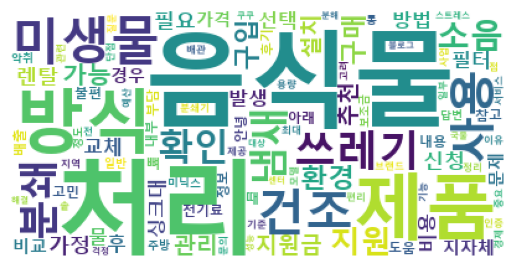

In [74]:
wc = WordCloud(
    font_path = "C:/Windows/Fonts/malgunbd.ttf",
    background_color='white'
).generate_from_frequencies(dict(top_100))
plt.imshow(wc)
plt.axis('off')
plt.show()